<a href="https://colab.research.google.com/github/SuniL-0007/Property-Pricer/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
"""from google.colab import drive
from google.colab import files

drive.mount("/content/drive")"""

'from google.colab import drive\nfrom google.colab import files\n\ndrive.mount("/content/drive")'

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Project Datasets/house_cleaned.csv")

In [ ]:
data

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,4 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3,"pooja room,study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",2.0,North-East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, g block, dlf phase-1, gurga...","['10 Light', 'No AC', 'No Bed', 'No Chimney', ...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN
960,3 Bedroom House for sale in DLF Phase 2,house,dlf city plots phase 2,4.25,31481.0,1350.0,Plot area 150(125.42 sq.m.),3,2,3,study room,"DLF Phase 2, Gurgaon, Haryana",2.0,North,10+ Year Old,"['Sahara Mall', 'Delhi Public School', 'Privat...","Residential house, k block, dlf phase-2, gurga...",NaN,"['High Ceiling Height', 'Maintenance Staff', '...","['Environment5 out of 5', 'Safety5 out of 5', ..."
961,3 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,4.50,33333.0,1350.0,Plot area 150(125.42 sq.m.),3,3,2,"study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",2.0,East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, e block 150 sq.Yds , dlf ph...","['6 Fan', '20 Light', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN
962,3 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,study room,"Sector 26 Gurgaon, Gurgaon, Haryana",2.0,West,

In [ ]:
df=data.copy()

In [ ]:
len(df)

964

In [ ]:
df.shape

(964, 20)

In [ ]:
df.columns

Index(['property_name', 'property_type', 'society', 'price', 'price_per_sqft',
       'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'address', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'description', 'furnishDetails', 'features',
       'rating'],
      dtype='object')

In [ ]:
df=df.drop('property_type',axis=1)

In [ ]:
df.isna().sum()

,0
property_name,0
society,0
price,19
price_per_sqft,19
area,19
areaWithType,0
bedRoom,0
bathroom,0
balcony,0
additionalRoom,0


In [ ]:
df['property_name'] = df['property_name'].str.split(' for ').str[0]

In [ ]:
#df.to_csv('house_cleaned.csv', index=False)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Project Datasets/Cleaned_House.csv")

In [ ]:
df

,property_name,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,...,agePossession,nearbyLocations,description,furnishDetails,features,rating,Environment Rating,Lifestyle Rating,Connectivity Rating,Saftey Rating
0,5 Bedroom House,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,...,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",5.0,4.0,4.0,4.0
1,5 Bedroom House,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room",...,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN,NaN,NaN,NaN,NaN
2,10 Bedroom House,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,...,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",5.0,5.0,5.0,5.0
3,21 Bedroom House,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,...,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5...",4.0,5.0,4.0,4.0
4,12 Bedroom House,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,...,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,4 Bedroom House,dlf city phase 1,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3,"pooja room,study room,servant room",...,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, g block, dlf phase-1, gurga...","['10 Light', 'No AC', 'No Bed', 'No Chimney', ...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN,NaN,NaN,NaN,NaN
960,3 Bedroom House,dlf city plots phase 2,4.25,31481.0,1350.0,Plot area 150(125.42 sq.m.),3,2,3,study room,...,10+ Year Old,"['Sahara Mall', 'Delhi Public School', 'Privat...","Residential house, k block, dlf phase-2, gurga...",NaN,"['High Ceiling Height', 'Maintenance Staff', '...","['Environment5 out of 5', 'Safety5 out of 5', ...",5.0,5.0,5.0,5.0
961,3 Bedroom House,dlf city phase 1,4.50,33333.0,1350.0,Plot area 150(125.42 sq.m.),3,3,2,"study room,servant room",...,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, e block 150 sq.Yds , dlf ph...","['6 Fan', '20 Light', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,NaN,NaN,NaN,NaN
962,3 Bedroom House,dlf city phase 1,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,study room,...,10+ Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, e block, dlf phase-1, gurga...","['5 Fan', '16 Light', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['property_name', 'society', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'address', 'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'description', 'furnishDetails', 'features', 'rating',
       'Environment Rating', 'Lifestyle Rating ', 'Connectivity Rating',
       'Saftey Rating'],
      dtype='object')

In [ ]:
df=df.drop('description',axis=1)

In [ ]:
df=df.drop('rating',axis=1)

In [ ]:
df.isna().sum()

,0
property_name,0
society,0
price,19
price_per_sqft,19
area,19
areaWithType,0
bedRoom,0
bathroom,0
balcony,0
additionalRoom,0


In [ ]:
# Fill missing values for numerical columns with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check the dataframe after filling missing values
missing_values_after = df.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]

# Display the missing values after filling
print(missing_values_after)

Series([], dtype: int64)


In [ ]:
df=df.drop('areaWithType',axis=1)

In [ ]:
df.isna().sum()

,0
property_name,0
society,0
price,0
price_per_sqft,0
area,0
bedRoom,0
bathroom,0
balcony,0
additionalRoom,0
address,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['facing'] = le.fit_transform(df['facing'])

In [ ]:
# Create a new column 'furnishing_status' and initialize it with 'Unfurnished'
df['furnishing_status'] = 'Unfurnished'

# Update the 'furnishing_status' based on conditions
df.loc[df['furnishDetails'] == 'Yes', 'furnishing_status'] = 'Partially Furnished'

# Update for rows with comma-separated items
df.loc[df['furnishDetails'].str.contains(',', na=False), 'furnishing_status'] = df['furnishDetails'][df['furnishDetails'].str.contains(',', na=False)].apply(lambda x: 'Fully Furnished' if len(x.split(',')) >= 5 else 'Partially Furnished')

# Print the updated DataFrame
df['furnishing_status'].value_counts()

,count
furnishing_status,
Fully Furnished,888
Unfurnished,76


In [ ]:
# Get the value counts for 'agePossession'
age_counts = df['agePossession'].value_counts()

# Get the values with counts less than 10
values_to_change = age_counts[age_counts < 10].index

# Replace those values with '0 to 1 Year Old'
df['agePossession'] = df['agePossession'].replace(values_to_change, '0 to 1 Year Old')

# Print the updated 'agePossession' column
df['agePossession'] = df['agePossession'].replace('undefined', '0 to 1 Year Old')
df['agePossession'].value_counts()

,count
agePossession,
0 to 1 Year Old,271
5 to 10 Year Old,250
1 to 5 Year Old,227
10+ Year Old,216


In [ ]:
df=df.drop('furnishDetails',axis=1)

In [ ]:
features = ['Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking',
            'Waste Disposal', 'Rain Water Harvesting','Security']

for feature in features:
    df[feature] = df['features'].apply(lambda x: 1 if feature in x else 0)

In [ ]:
df=df.drop(['features'],axis=1)

In [ ]:
#pip install opencage

In [ ]:
# from opencage.geocoder import OpenCageGeocode

# # Your API key for OpenCage
# API_KEY = 'c4f85641bf5546ce864660468b67485d'
# geocoder = OpenCageGeocode(API_KEY)


# # Function to get latitude and longitude
# def get_coordinates(address):
#     result = geocoder.geocode(address)
#     if result:
#         return result[0]['geometry']['lat'], result[0]['geometry']['lng']
#     return None, None

# # Apply the function to get latitude and longitude
# df[['latitude', 'longitude']] = df['address'].apply(lambda x: pd.Series(get_coordinates(x)))



In [ ]:
#df.to_csv('Homes.csv', index=False)

In [ ]:
# Define weights for each room type
room_weights = {
    'servant room': 0.5,
    'pooja room': 1,
    'store room': 1,
    'others': 0.5,
    'not available': 0,
    'study room': 1
}

# Function to calculate cumulative weight for each entry
def calculate_cumulative_weight(rooms):
    rooms_list = rooms.split(',')
    return sum(room_weights.get(room.strip(), 0) for room in rooms_list)

# Apply the function to calculate cumulative weights
df['cumulative_weight'] = df['additionalRoom'].apply(calculate_cumulative_weight)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Project Datasets/Homes (2).csv")

In [ ]:
print(df[['latitude', 'longitude']].isnull().sum())

latitude     28
longitude    28
dtype: int64


In [ ]:
df['latitude'].fillna(df['latitude'].median(), inplace=True)
df['longitude'].fillna(df['longitude'].median(), inplace=True)

In [ ]:
df[['latitude', 'longitude']].isnull().sum()

,0
latitude,0
longitude,0


In [ ]:
# Range for latitude and longitude
lat_range = df['latitude'].min(), df['latitude'].max()
lon_range = df['longitude'].min(), df['longitude'].max()

print("Latitude Range:", lat_range)
print("Longitude Range:", lon_range)


Latitude Range: (26.91667, 53.35222)
Longitude Range: (-100.35875, 87.91667)


In [ ]:
lat_std = df['latitude'].std()
lon_std = df['longitude'].std()

print("Latitude Standard Deviation:", lat_std)
print("Longitude Standard Deviation:", lon_std)


Latitude Standard Deviation: 1.7610328718414632
Longitude Standard Deviation: 11.323109131551421


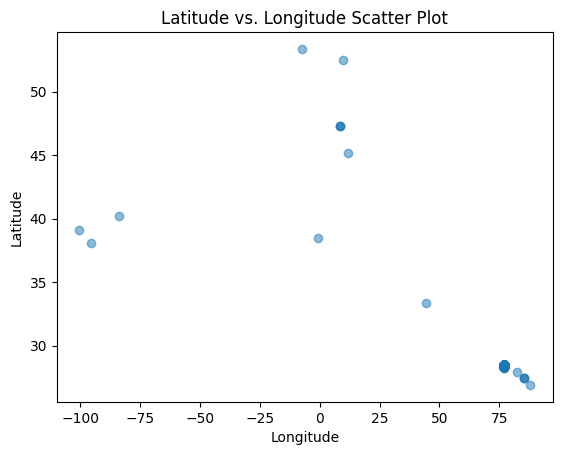

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['longitude'], df['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs. Longitude Scatter Plot')
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Use NearestNeighbors to find the average distance to the 5 nearest points
coords = df[['latitude', 'longitude']].values
nbrs = NearestNeighbors(n_neighbors=5).fit(coords)
distances, indices = nbrs.kneighbors(coords)

# Calculate mean distance to the nearest neighbors
mean_distance = np.mean(distances[:, 1:])
print("Average Distance to Nearest Neighbors:", mean_distance)


Average Distance to Nearest Neighbors: 0.25332370506637353


Cluster Counts:
 region_cluster
 0    948
-1     16
Name: count, dtype: int64


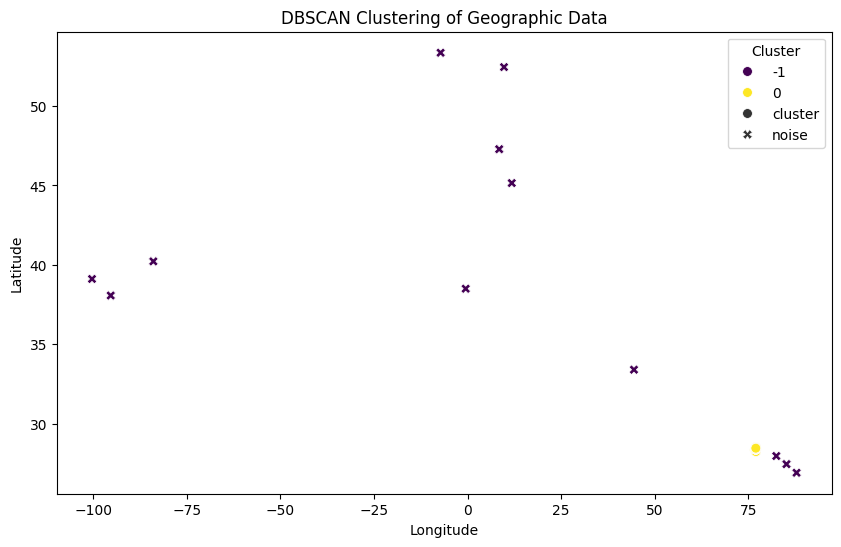

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
df['region_cluster'] = dbscan.fit_predict(df[['latitude', 'longitude']])

# Count points in each cluster
cluster_counts = df['region_cluster'].value_counts()
print("Cluster Counts:\n", cluster_counts)

# Visualize the clusters and noise
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='longitude', y='latitude',
    hue='region_cluster',
    data=df,
    palette='viridis',
    legend='full',
    s=50,
    style=df['region_cluster'].apply(lambda x: 'noise' if x == -1 else 'cluster')
)

plt.title('DBSCAN Clustering of Geographic Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


In [ ]:
df.columns

Index(['property_name', 'society', 'price', 'price_per_sqft', 'area',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'address',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'Environment Rating', 'Lifestyle Rating ', 'Connectivity Rating',
       'Saftey Rating', 'furnishing_status', 'Private Garden / Terrace',
       'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking',
       'Waste Disposal', 'Rain Water Harvesting', 'Security',
       'cumulative_weight', 'latitude', 'longitude', 'region_cluster'],
      dtype='object')

In [ ]:
df

,property_name,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,additionalRoom,address,...,Water Storage,Park,Visitor Parking,Waste Disposal,Rain Water Harvesting,Security,cumulative_weight,latitude,longitude,region_cluster
0,5 Bedroom House,bptp visionnaire,5.25,20115.0,2610.0,5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",...,1,1,1,1,1,0,0.5,28.384668,77.022039,0
1,5 Bedroom House,independent,5.70,105751.0,539.0,5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",...,0,1,1,0,0,0,2.5,28.460100,77.026350,0
2,10 Bedroom House,independent,2.10,38251.0,549.0,10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",...,1,1,1,1,0,0,0.5,28.454569,77.082625,0
3,21 Bedroom House,independent,5.00,43066.0,1161.0,21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",...,1,1,1,1,1,0,0.5,28.441611,77.111872,0
4,12 Bedroom House,independent,3.00,53763.0,558.0,12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",...,1,1,1,1,0,0,0.5,28.454569,77.082625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,4 Bedroom House,dlf city phase 1,5.50,30556.0,1800.0,4,4,3,"pooja room,study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",...,1,1,1,0,0,0,2.5,28.477937,77.103242,0
960,3 Bedroom House,dlf city plots phase 2,4.25,31481.0,1350.0,3,2,3,study room,"DLF Phase 2, Gurgaon, Haryana",...,1,1,1,1,1,0,1.0,28.483901,77.084610,0
961,3 Bedroom House,dlf city phase 1,4.50,33333.0,1350.0,3,3,2,"study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",...,1,1,1,1,1,0,1.5,28.477937,77.103242,0
962,3 Bedroom House,dlf city phase 1,3.25,33129.0,981.0,3,3,3,study room,"Sector 26 Gurgaon, Gurgaon, Haryana",...,1,1,1,1,0,1,1.0,28.477937,77.103242,0


In [ ]:
df.to_csv("Pre_processed Data.csv",index=False)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is 'society'

# Replace values in 'society' column
df['society'] = df['society'].apply(lambda x: x if x == 'independent' else 'Gated Community')

# Verify the changes
print(df['society'].value_counts())

society
independent        569
Gated Community    395
Name: count, dtype: int64


In [ ]:
df

,property_name,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,additionalRoom,address,...,Water Storage,Park,Visitor Parking,Waste Disposal,Rain Water Harvesting,Security,cumulative_weight,latitude,longitude,region_cluster
0,5 Bedroom House,Gated Community,5.25,20115.0,2610.0,5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",...,1,1,1,1,1,0,0.5,28.384668,77.022039,0
1,5 Bedroom House,independent,5.70,105751.0,539.0,5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",...,0,1,1,0,0,0,2.5,28.460100,77.026350,0
2,10 Bedroom House,independent,2.10,38251.0,549.0,10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",...,1,1,1,1,0,0,0.5,28.454569,77.082625,0
3,21 Bedroom House,independent,5.00,43066.0,1161.0,21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",...,1,1,1,1,1,0,0.5,28.441611,77.111872,0
4,12 Bedroom House,independent,3.00,53763.0,558.0,12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",...,1,1,1,1,0,0,0.5,28.454569,77.082625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,4 Bedroom House,Gated Community,5.50,30556.0,1800.0,4,4,3,"pooja room,study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",...,1,1,1,0,0,0,2.5,28.477937,77.103242,0
960,3 Bedroom House,Gated Community,4.25,31481.0,1350.0,3,2,3,study room,"DLF Phase 2, Gurgaon, Haryana",...,1,1,1,1,1,0,1.0,28.483901,77.084610,0
961,3 Bedroom House,Gated Community,4.50,33333.0,1350.0,3,3,2,"study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",...,1,1,1,1,1,0,1.5,28.477937,77.103242,0
962,3 Bedroom House,Gated Community,3.25,33129.0,981.0,3,3,3,study room,"Sector 26 Gurgaon, Gurgaon, Haryana",...,1,1,1,1,0,1,1.0,28.477937,77.103242,0


In [ ]:
df.to_csv("Pre_processed Data1.csv",index=False)

# Exploratory Data Analysis



In [ ]:
# Displaying basic information about the dataframe
print(df.info())

# Descriptive statistics of the dataset
print(df.describe())

# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   property_name             964 non-null    object 
 1   society                   964 non-null    object 
 2   price                     964 non-null    float64
 3   price_per_sqft            964 non-null    float64
 4   area                      964 non-null    float64
 5   bedRoom                   964 non-null    int64  
 6   bathroom                  964 non-null    int64  
 7   balcony                   964 non-null    object 
 8   additionalRoom            964 non-null    object 
 9   address                   964 non-null    object 
 10  floorNum                  964 non-null    float64
 11  facing                    964 non-null    int64  
 12  agePossession             964 non-null    object 
 13  nearbyLocations           964 non-null    object 
 14  Environmen

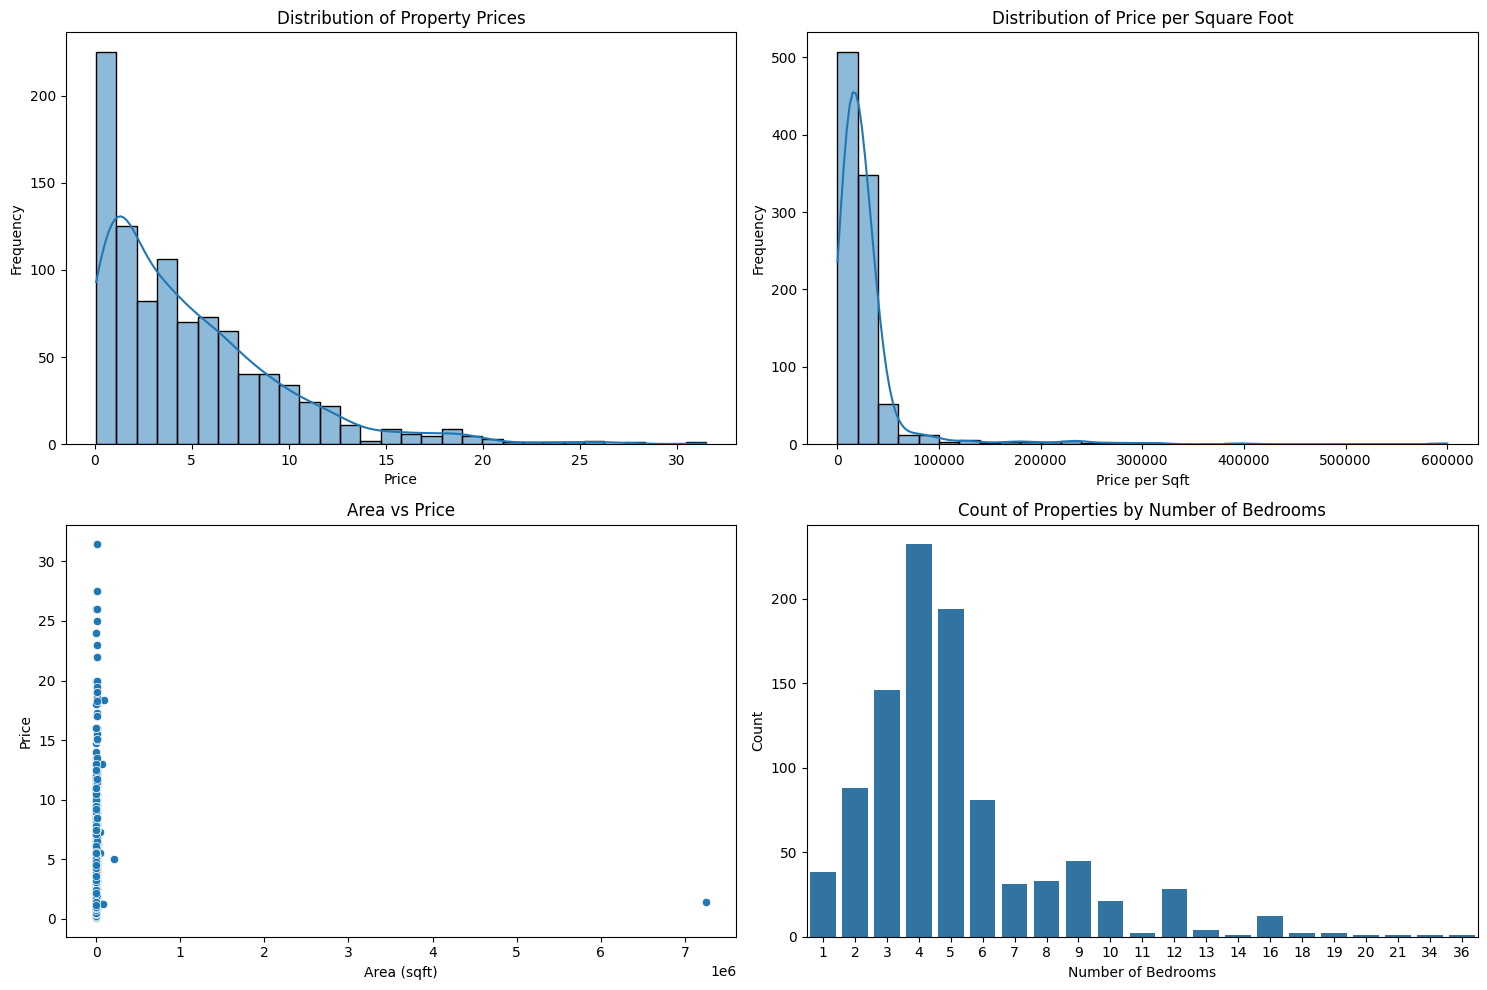

In [ ]:
plt.figure(figsize=(15, 10))

# 1. Distribution of property prices
plt.subplot(2, 2, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 2. Price per square foot
plt.subplot(2, 2, 2)
sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')

# 3. Relationship between area and price
plt.subplot(2, 2, 3)
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')

# 4. Count of properties by number of bedrooms
plt.subplot(2, 2, 4)
sns.countplot(x='bedRoom', data=df)
plt.title('Count of Properties by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Identifying numeric columns in the dataframe
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_columns)

['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum', 'facing', 'Environment Rating', 'Lifestyle Rating ', 'Connectivity Rating', 'Saftey Rating', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting', 'Security', 'cumulative_weight', 'latitude', 'longitude', 'region_cluster']


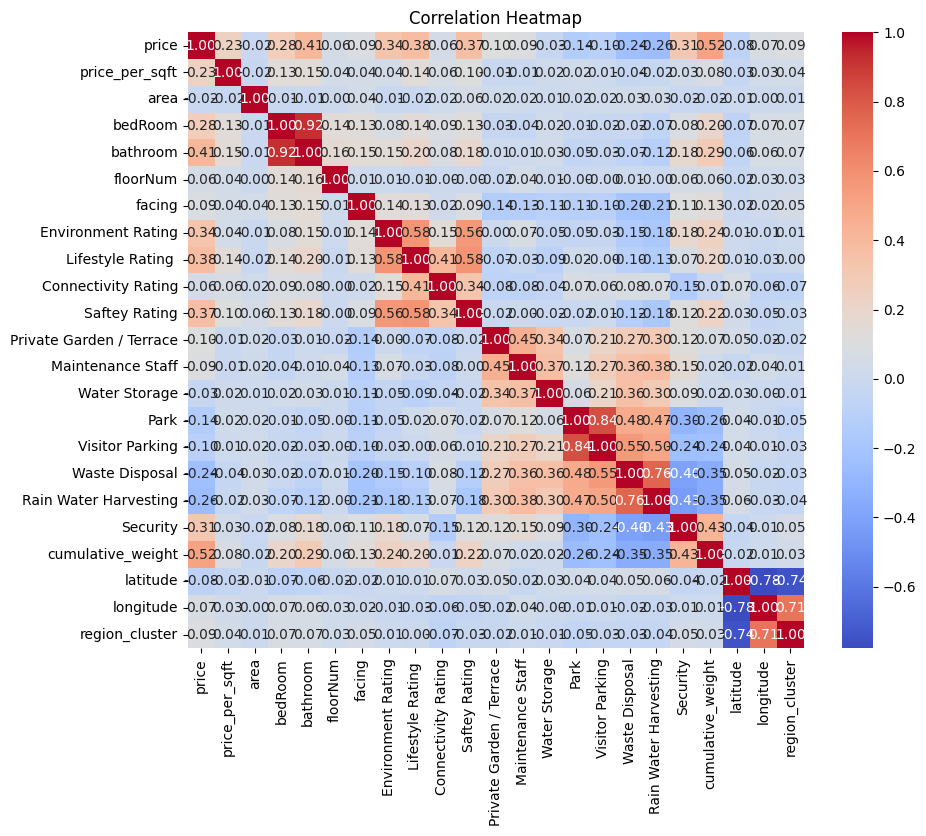

In [ ]:
# Creating a correlation heatmap using only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

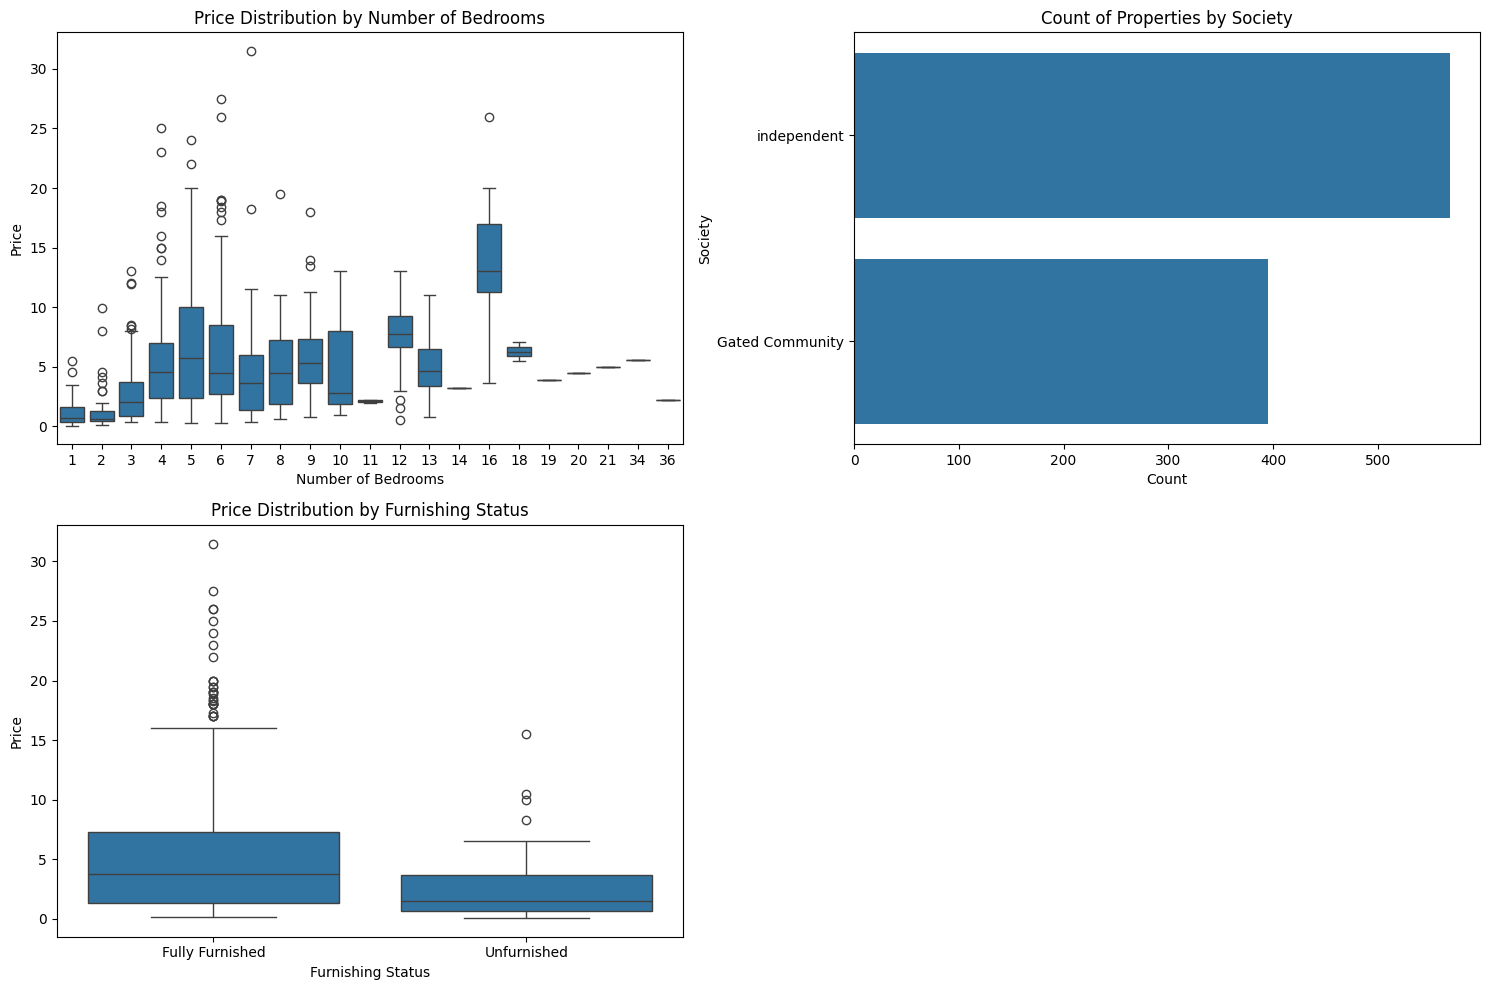

In [ ]:
# Setting up additional visualizations for box plots and count plots
plt.figure(figsize=(15, 10))

# 1. Box Plot for Price by Number of Bedrooms
plt.subplot(2, 2, 1)
sns.boxplot(x='bedRoom', y='price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

# 2. Count of Properties by Society
plt.subplot(2, 2, 2)
sns.countplot(y='society', data=df, order=df['society'].value_counts().index)
plt.title('Count of Properties by Society')
plt.xlabel('Count')
plt.ylabel('Society')

# 3. Box Plot for Price by Furnishing Status
plt.subplot(2, 2, 3)
sns.boxplot(x='furnishing_status', y='price', data=df)
plt.title('Price Distribution by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Identifying outliers using the IQR method
Q1 = df[['price', 'area']].quantile(0.25)
Q3 = df[['price', 'area']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating a boolean mask for outliers
outliers_mask = (df[['price', 'area']] < lower_bound) | (df[['price', 'area']] > upper_bound)

# Counting the number of outliers in each column
outliers_count = outliers_mask.sum()
outliers_count

,0
price,36
area,37


In [ ]:
# Capping outliers in the price and area columns
# Capping at the upper and lower bounds determined by the IQR method
# For price
df['price'] = df['price'].clip(lower=lower_bound['price'], upper=upper_bound['price'])
# For area
# Assuming area is also numeric and needs capping
# If area is not numeric, we need to convert it first
if df['area'].dtype == 'object':
    df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['area'] = df['area'].clip(lower=lower_bound['area'], upper=upper_bound['area'])

# Checking the head of the modified dataframe to confirm changes
modified_head = df.head()

In [ ]:
df

,property_name,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,additionalRoom,address,...,Water Storage,Park,Visitor Parking,Waste Disposal,Rain Water Harvesting,Security,cumulative_weight,latitude,longitude,region_cluster
0,5 Bedroom House,Gated Community,5.25,20115.0,2610.0,5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",...,1,1,1,1,1,0,0.5,28.384668,77.022039,0
1,5 Bedroom House,independent,5.70,105751.0,539.0,5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",...,0,1,1,0,0,0,2.5,28.460100,77.026350,0
2,10 Bedroom House,independent,2.10,38251.0,549.0,10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",...,1,1,1,1,0,0,0.5,28.454569,77.082625,0
3,21 Bedroom House,independent,5.00,43066.0,1161.0,21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",...,1,1,1,1,1,0,0.5,28.441611,77.111872,0
4,12 Bedroom House,independent,3.00,53763.0,558.0,12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",...,1,1,1,1,0,0,0.5,28.454569,77.082625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,4 Bedroom House,Gated Community,5.50,30556.0,1800.0,4,4,3,"pooja room,study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",...,1,1,1,0,0,0,2.5,28.477937,77.103242,0
960,3 Bedroom House,Gated Community,4.25,31481.0,1350.0,3,2,3,study room,"DLF Phase 2, Gurgaon, Haryana",...,1,1,1,1,1,0,1.0,28.483901,77.084610,0
961,3 Bedroom House,Gated Community,4.50,33333.0,1350.0,3,3,2,"study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",...,1,1,1,1,1,0,1.5,28.477937,77.103242,0
962,3 Bedroom House,Gated Community,3.25,33129.0,981.0,3,3,3,study room,"Sector 26 Gurgaon, Gurgaon, Haryana",...,1,1,1,1,0,1,1.0,28.477937,77.103242,0


In [ ]:
df.columns

Index(['property_name', 'society', 'price', 'price_per_sqft', 'area',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'address',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'Environment Rating', 'Lifestyle Rating ', 'Connectivity Rating',
       'Saftey Rating', 'furnishing_status', 'Private Garden / Terrace',
       'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking',
       'Waste Disposal', 'Rain Water Harvesting', 'Security',
       'cumulative_weight', 'latitude', 'longitude', 'region_cluster'],
      dtype='object')

In [ ]:
df=df.drop(['property_name','additionalRoom','address','nearbyLocations'],axis=1)

In [ ]:
df.to_csv("Final_Data.csv",index=False)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Project Datasets/Final_Data.csv")

In [ ]:
df.dtypes

,0
society,object
price,float64
price_per_sqft,int64
area,float64
bedRoom,int64
bathroom,int64
balcony,object
floorNum,int64
facing,int64
agePossession,object


In [ ]:
df

,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,...,Water Storage,Park,Visitor Parking,Waste Disposal,Rain Water Harvesting,Security,cumulative_weight,latitude,longitude,region_cluster
0,Gated Community,5.25,20115,2610.0,5,4,3+,3,2,0 to 1 Year Old,...,1,1,1,1,1,0,0.5,28.384668,77.022039,0
1,independent,5.70,105751,539.0,5,4,2,2,0,5 to 10 Year Old,...,0,1,1,0,0,0,2.5,28.460100,77.026350,0
2,independent,2.10,38251,549.0,10,10,3+,5,7,0 to 1 Year Old,...,1,1,1,1,0,0,0.5,28.454569,77.082625,0
3,independent,5.00,43066,1161.0,21,21,3+,5,1,1 to 5 Year Old,...,1,1,1,1,1,0,0.5,28.441611,77.111872,0
4,independent,3.00,53763,558.0,12,12,3+,5,7,0 to 1 Year Old,...,1,1,1,1,0,0,0.5,28.454569,77.082625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Gated Community,5.50,30556,1800.0,4,4,3,2,2,5 to 10 Year Old,...,1,1,1,0,0,0,2.5,28.477937,77.103242,0
960,Gated Community,4.25,31481,1350.0,3,2,3,2,1,10+ Year Old,...,1,1,1,1,1,0,1.0,28.483901,77.084610,0
961,Gated Community,4.50,33333,1350.0,3,3,2,2,0,5 to 10 Year Old,...,1,1,1,1,1,0,1.5,28.477937,77.103242,0
962,Gated Community,3.25,33129,981.0,3,3,3,2,7,10+ Year Old,...,1,1,1,1,0,1,1.0,28.477937,77.103242,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df['society'] = label_encoder.fit_transform(df['society'])
df['furnishing_status'] = label_encoder.fit_transform(df['furnishing_status'])
df['agePossession'] = label_encoder.fit_transform(df['agePossession'])
df['balcony'] = label_encoder.fit_transform(df['balcony'])
df

,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,...,Water Storage,Park,Visitor Parking,Waste Disposal,Rain Water Harvesting,Security,cumulative_weight,latitude,longitude,region_cluster
0,0,5.25,20115,2610.0,5,4,4,3,2,0,...,1,1,1,1,1,0,0.5,28.384668,77.022039,0
1,1,5.70,105751,539.0,5,4,2,2,0,3,...,0,1,1,0,0,0,2.5,28.460100,77.026350,0
2,1,2.10,38251,549.0,10,10,4,5,7,0,...,1,1,1,1,0,0,0.5,28.454569,77.082625,0
3,1,5.00,43066,1161.0,21,21,4,5,1,1,...,1,1,1,1,1,0,0.5,28.441611,77.111872,0
4,1,3.00,53763,558.0,12,12,4,5,7,0,...,1,1,1,1,0,0,0.5,28.454569,77.082625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,5.50,30556,1800.0,4,4,3,2,2,3,...,1,1,1,0,0,0,2.5,28.477937,77.103242,0
960,0,4.25,31481,1350.0,3,2,3,2,1,2,...,1,1,1,1,1,0,1.0,28.483901,77.084610,0
961,0,4.50,33333,1350.0,3,3,2,2,0,3,...,1,1,1,1,1,0,1.5,28.477937,77.103242,0
962,0,3.25,33129,981.0,3,3,3,2,7,2,...,1,1,1,1,0,1,1.0,28.477937,77.103242,0


In [ ]:
len(df.columns)

27

In [ ]:
df['balcony'].value_counts()

,count
balcony,
4,365
2,220
3,159
0,115
1,105


In [ ]:
df.dtypes

,0
society,int64
price,float64
price_per_sqft,int64
area,float64
bedRoom,int64
bathroom,int64
balcony,int64
floorNum,int64
facing,int64
agePossession,int64


In [ ]:
#df.to_csv("Data.csv",index=False)

## Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
# Assuming 'price' is the target variable and the rest are features
X = df.drop('price', axis=1)
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 0.41855599471502597
R^2 Score: 0.9711426872565194


# Gradient Boosting Regression

In [ ]:
# Import necessary libraries for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics for Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the performance metrics for Gradient Boosting
print('Mean Squared Error (Gradient Boosting):', mse_gb)
print('R^2 Score (Gradient Boosting):', r2_gb)

Mean Squared Error (Gradient Boosting): 0.4208422685401683
R^2 Score (Gradient Boosting): 0.9709850602732187


# Ensemble Model

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Selecting features and target variable
features = df.drop(columns=['price'])  # Assuming 'price' is the target variable
target = df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating ensemble model using Voting Regressor
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
ensemble_model = VotingRegressor(estimators=[('rf', model1), ('gb', model2)])

# Fitting the model
ensemble_model.fit(X_train, y_train)

# Making predictions
predictions = ensemble_model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = mse ** 0.5

# Displaying performance metrics
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error: 0.3920032205315534
R^2 Score: 0.9729733663496266
Mean Absolute Error (MAE): 0.30057319756657147
Root Mean Squared Error (RMSE): 0.6261016055973291


In [ ]:
# Importing necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid for RandomForestRegressor and GradientBoostingRegressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Performing Grid Search for RandomForestRegressor
grid_search_rf = GridSearchCV(estimator=model1, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Performing Grid Search for GradientBoostingRegressor
grid_search_gb = GridSearchCV(estimator=model2, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Getting the best parameters
best_params_rf = grid_search_rf.best_params_
best_params_gb = grid_search_gb.best_params_

# Displaying the best parameters for both models
print('Best parameters for RandomForestRegressor:', best_params_rf)
print('Best parameters for GradientBoostingRegressor:', best_params_gb)

Best parameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
# Retraining the ensemble model with the best parameters
model1_best = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42)
model2_best = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
ensemble_model_best = VotingRegressor(estimators=[('rf', model1_best), ('gb', model2_best)])

# Fitting the model with the best parameters
ensemble_model_best.fit(X_train, y_train)

# Making predictions with the retrained model
predictions_best = ensemble_model_best.predict(X_test)

# Calculating performance metrics for the retrained model
mse_best = mean_squared_error(y_test, predictions_best)
r2_best = r2_score(y_test, predictions_best)

# Displaying performance metrics for the retrained model
print('Mean Squared Error (Best Model):', mse_best)
print('R^2 Score (Best Model):', r2_best)

Mean Squared Error (Best Model): 0.33830932782381573
R^2 Score (Best Model): 0.9766752878938086


In [ ]:
# Performing feature engineering by creating new features
# For example, we can create a feature for total rooms (bedrooms + bathrooms + balcony)
df['total_rooms'] = df['bedRoom'] + df['bathroom'] + df['balcony']

# We can also create a feature for age of the house based on the possession age
# Assuming 'agePossession' is in years, we can create a feature for the age of the house
# This might need to be adjusted based on the actual meaning of 'agePossession'
df['house_age'] = df['agePossession']

# Dropping the original columns that are no longer needed
features = df.drop(columns=['price', 'bedRoom', 'bathroom', 'balcony', 'agePossession'])

# Splitting the dataset again with the new features
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Retraining the ensemble model with the new features
ensemble_model_best.fit(X_train, y_train)

# Making predictions with the updated model
predictions_best = ensemble_model_best.predict(X_test)

# Calculating performance metrics for the updated model
mse_best = mean_squared_error(y_test, predictions_best)
r2_best = r2_score(y_test, predictions_best)

# Displaying performance metrics for the updated model
print('Mean Squared Error (Updated Model):', mse_best)
print('R^2 Score (Updated Model):', r2_best)
# Calculating accuracy for regression models is typically done using R^2 score or Mean Absolute Error (MAE)
# Here, we will calculate the Mean Absolute Error (MAE) as an additional accuracy measure
from sklearn.metrics import mean_absolute_error

# Calculating Mean Absolute Error
mae_best = mean_absolute_error(y_test, predictions_best)

# Displaying the Mean Absolute Error
print('Mean Absolute Error (Updated Model):', mae_best)

Mean Squared Error (Updated Model): 0.3280045771931077
R^2 Score (Updated Model): 0.9773857481797649
Mean Absolute Error (Updated Model): 0.26900613878701424


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, and y_test are already defined
# Evaluate on training set
y_train_pred = ensemble_model_best.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate on test set
y_test_pred = ensemble_model_best.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
print("Training Set Performance:")
print(f"Mean Squared Error: {mse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R^2 Score: {r2_train}")

print("\nTest Set Performance:")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R^2 Score: {r2_test}")

Training Set Performance:
Mean Squared Error: 0.033571413860472535
Mean Absolute Error: 0.09716804455000631
R^2 Score: 0.998087598638508

Test Set Performance:
Mean Squared Error: 0.3280045771931077
Mean Absolute Error: 0.26900613878701424
R^2 Score: 0.9773857481797649


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Define custom scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform 5-fold cross-validation
mse_scores = cross_val_score(ensemble_model_best, X, y, cv=5, scoring=mse_scorer)
r2_scores = cross_val_score(ensemble_model_best, X, y, cv=5, scoring=r2_scorer)

# Print the results
print("Cross-validated Mean Squared Error (MSE):", -mse_scores.mean())
print("Cross-validated R^2 Score:", r2_scores.mean())


Cross-validated Mean Squared Error (MSE): 0.5169182689193099
Cross-validated R^2 Score: 0.9608709572402443


In [ ]:
import joblib
joblib.dump(ensemble_model_best, 'ensemble_model_best.pkl')

['ensemble_model_best.pkl']

In [ ]:
# Creating a function to predict house price based on user input
import numpy as np

def predict_house_price(input_data):
    # Creating a DataFrame from the input data
    input_df = pd.DataFrame([input_data])

    # Adding the engineered features
    input_df['total_rooms'] = input_df['bedRoom'] + input_df['bathroom'] + input_df['balcony']
    input_df['house_age'] = input_df['agePossession']

    # Dropping the original columns that are no longer needed
    input_df = input_df.drop(columns=['bedRoom', 'bathroom', 'balcony', 'agePossession'])

    # Making predictions
    prediction = ensemble_model_best.predict(input_df)
    return prediction[0]  # Return the predicted price

# Example input data for testing the function
example_input = {
    'society': 1,
    'price_per_sqft': 20011,
    'area': 1500,
    'bedRoom': 3,
    'bathroom': 2,
    'balcony': 1,
    'floorNum': 5,
    'facing': 2,
    'agePossession': 5,
    'Environment Rating': 5,
    'Lifestyle Rating ': 5,
    'Connectivity Rating': 5,
    'Saftey Rating': 5,
    'furnishing_status': 1,
    'Private Garden / Terrace': 1,
    'Maintenance Staff': 1,
    'Water Storage': 1,
    'Park': 1,
    'Visitor Parking': 1,
    'Waste Disposal': 1,
    'Rain Water Harvesting': 1,
    'Security': 1,
    'cumulative_weight': 10,
    'latitude': 37.7749,
    'longitude': -122.4194,
    'region_cluster': -1
}



In [ ]:
# Testing the prediction function with example input
predicted_price = predict_house_price(example_input)
print('Predicted House Price:', round(predicted_price,2))

Predicted House Price: 3.09
